In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.differentiate import derivative

**Gradient Descent**

In [ ]:
def f(x, y):
    return x**2 + y**2

def gradient_f(x, y):
    return np.array([2*x, 2*y])

def gradient_descent(f, grad_f, x0, learning_rate=0.1, iterations=100, tolerance=1e-5):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    
    for i in range(iterations):
        gradient = grad_f(x[0], x[1])
        
        x_new = x - learning_rate * gradient
        
        if np.linalg.norm(x_new - x) < tolerance:
            print(f"Converged after {i+1} iterations")
            break
        
        x = x_new
        history.append(x.copy())
    
    return x, history


x0 = np.array([5.0, 5.0])
minimum, history = gradient_descent(f, gradient_f, x0, learning_rate=0.1, iterations=100)

print(f"Minimum found at: {minimum}")
print(f"Function value: {f(minimum[0], minimum[1])}")

Converged after 55 iterations
Minimum found at: [2.92300327e-05 2.92300327e-05]
Function value: 1.7087896287367294e-09


**Learning Rate**

In [ ]:
# Too small: Slow convergence
x_small_lr, _ = gradient_descent(f, gradient_f, [5, 5], learning_rate=0.01, iterations=50)
print(f"Small LR result: {x_small_lr}")

# Too large: May diverge or oscillate
x_large_lr, _ = gradient_descent(f, gradient_f, [5, 5], learning_rate=1.0, iterations=50)
print(f"Large LR result: {x_large_lr}")

# Good learning rate
x_good_lr, _ = gradient_descent(f, gradient_f, [5, 5], learning_rate=0.1, iterations=50)
print(f"Good LR result: {x_good_lr}")

Small LR result: [1.8208484 1.8208484]
Large LR result: [5. 5.]
Good LR result: [7.13623846e-05 7.13623846e-05]


**Visualizing Gradient Descent**

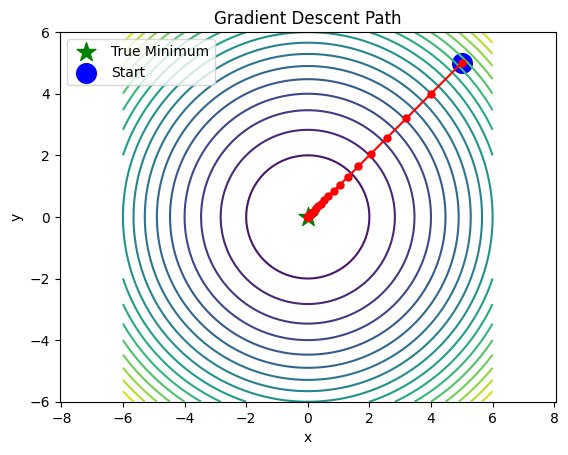

In [7]:
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# visualization
plt.contour(X, Y, Z, levels=20)
history_array = np.array(history)
plt.plot(history_array[:, 0], history_array[:, 1], 'ro-', markersize=5)
plt.scatter([0], [0], color='green', s=200, marker='*', label='True Minimum')
plt.scatter([history_array[0, 0]], [history_array[0, 1]], 
           color='blue', s=200, marker='o', label='Start')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Path')
plt.legend()
plt.axis('equal')
plt.show()